<h1><center>Predicting Video Game Success</center></h1>
<center>Ben Urban</center>

![image](resources/Consoles.jpg)

<h2>Introduction</h2>
The video game industry is one of the fastest growing forms of entertainment out there right now. Hundreds of new games are released every year all with different styles across multiple platforms. Some games are absolute masterpieces and loved by millions, while others get no attention at all. All developers have the same thought on their mind: "How can I make the best game possible?"

In this tutorial we will collect data about video games past, and see how we can use developer's decisions before us, to give reasoning to how their games performed. If we can develop a strong relationship between developer decisions and game performance, we will be able to accurately predict how future games will perform before they are even released. We can use this knowlege as developers to design a game with the highest probability of success.
    
<h2> Part 1: Data Collection</h2>

In [2]:
#Libraries needed to proceed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

This data is rounded up from a csv file that can be found <a href = "https://corgis-edu.github.io/corgis/csv/video_games/">here</a>. This dataset provides information for over a thousand games released from 2004 to 2008. Unfortunately that 5 year range was 12-16 years ago from today, so it may be difficult to base decions for the future off 12 year old data, but it can still provide valuable information. This data also does not include PC releases for games so we will only be exploring from a console development perspective

The first thing we need to is import the data into a Pandas dataframe. After that we can clean up the table to only provide the information that we need. We will also generalize the platform of the game's release to the console's parent company. This is because current games are very rarely produced for any of the consoles listed in the table, however these companies still have the leading consoles on the market today

***Games with multiple genres and platform releases will be duplicated so that they can be applied to multiple categories. For example, a 2 genre game on 2 platforms will appear 4 total times so that all platform and genre combinations appear 

In [3]:
#Ipmort Data from CSV
data = pd.read_csv("resources/video_games.csv")

#Drop unused data
data = data.drop(data.columns[[1,3,4,6,7,8,11,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]],axis = 1)

#Rename and Reorder Columns
data = data.rename(columns={"Features.Max Players": "Players", "Metadata.Genres": "Genre", "Metrics.Review Score" : "Score",\
                           "Metrics.Sales": "Sales", "Release.Console": "Platform", "Release.Year": "Year",\
                           "Length.All PlayStyles.Average": "Playtime"})
data = data[['Title', 'Year','Platform','Genre','Players','Score','Sales','Playtime']]

#Drop Rows with missing data
data = data[data.Playtime != 0]

#Generalize Platform
data = data.replace("Nintendo DS", "Nintendo")
data = data.replace("Nintendo Wii", "Nintendo")
data = data.replace("Sony PSP", "Playstation")
data = data.replace("X360", "Xbox")
data = data.replace("PlayStation 3", "Playstation")

#Max out all games with more than 4 players at 4 because of low sample size
data = data.replace(6, 4)
data = data.replace(7, 4)
data = data.replace(8, 4)

#Split game's list of genres into muliple separate games with 1 genre
data['Genre'] = data['Genre'].str.split(",")

data = pd.DataFrame({
      col:np.repeat(data[col].values, data['Genre'].str.len())
      for col in data.columns.drop('Genre')}
    ).assign(**{'Genre':np.concatenate(data['Genre'].values)})[data.columns]

#Sort alphabetically and display preview
data = data.sort_values('Title')
data

,Title,Year,Platform,Genre,Players,Score,Sales,Playtime
390,007: From Russia with Love,2006,Playstation,Racing / Driving,1,61,0.07,6.383333
389,007: From Russia with Love,2006,Playstation,Action,1,61,0.07,6.383333
660,300: March to Glory,2007,Playstation,Action,1,55,0.26,7.400000
806,7 Wonders of the Ancient World,2007,Playstation,Strategy,1,51,0.08,7.483333
785,7 Wonders of the Ancient World,2007,Nintendo,Strategy,1,60,0.10,7.483333
...,...,...,...,...,...,...,...,...
825,Zoids Assault,2007,Xbox,Role-Playing (RPG),1,46,0.07,12.050000
24,Zoo Keeper,2004,Nintendo,Action,1,74,0.10,7.150000
1274,Zubo,2008,Nintendo,Adventure,1,75,0.05,15.000000
1276,Zubo,2008,Nintendo,Strategy,1,75,0.05,15.000000


<h2>Part 2: Analysis</h2>
Now the data is cleaned up and ready to be analyzed. There are 7 metrics we can now use to compare our games:  
<ol>
    <li>Year Released</li>
    <li>Platform the game was released on</li>
    <li>Game genre</li>
    <li>Number of players that the game supports (1, 2, or 4+)</li>
    <li>Score the game was given by reviewers (Metacritic)</li>
    <li>The game's total sales (in millions of dollars)</li>
    <li>Average playtime by its playerbase (hours)</li>
</ol>

The first 4 of these are independant variables in our data. These are conscious decisions made by the developers when they made their game, as well as factors that future developers can take into account when making their games. Since release year is not really a controllable factor other than delaying or rushing a game's development we will use that for something a little later and focus on the other 3. The remaining 3 metrics are the dependant variables in this situation. These are statistics based on how players reacted to the game. They can not be controlled by the developers, but understanding how to improve them is crucial to game development. A developer's end goal is to produce a game with the highest critic score, sales numbers, and player involvement as possible.   

The first thing we can do to recognize a pattern is test how the controlable factors of a game (Platform, Genre, Max Players) influence the results of the 3 performance metrics(Critic Score, Sales, Average Playtime). To do this we need to analyze the 3 independant variables one at a time. We can separate the data by the independent variable we want to focus on, then make a boxplot for how the games categories perform. We can start by separating the games by platform, and making 3 separate boxplots to measure how each of ther performance metrics change.

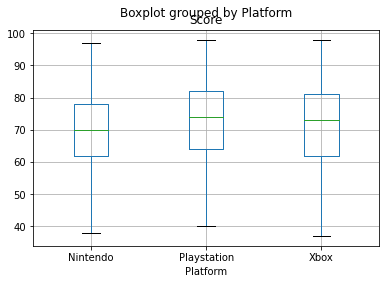

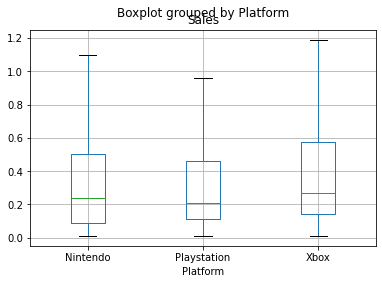

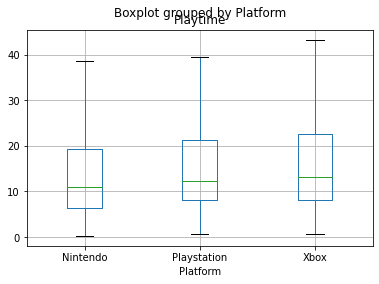

In [4]:
#Make bxplots of score, sales, and playtime separated by platform
#Not displaying outliers to make plots readable since we wnat to focus on averages
data.boxplot(column = ['Score'], by = 'Platform', showfliers = False)
data.boxplot(column = ['Sales'], by = 'Platform', showfliers = False)
data.boxplot(column = ['Playtime'], by = 'Platform', showfliers = False)
plt.show()


After looking at these plots you can see that Xbox games, on average, tend to sell more and have a longer lifespan than their Nintendo and Playstation counterparts, while Playstation games tend to be better critically recieved. Its up to you to determine which of those factors you find more important in a successful game, but for now lets continue by repeating the same thing, but with a game's maximum number of players

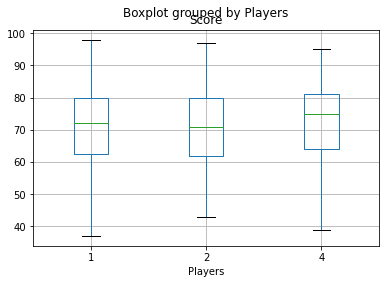

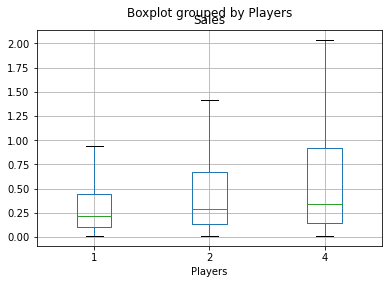

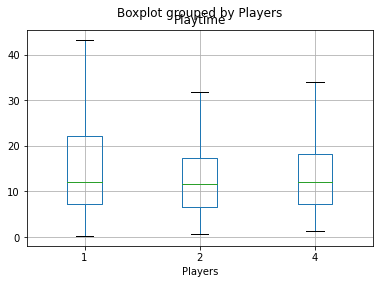

In [5]:
#Repeat previous step but with max players
data.boxplot(column = ['Score'], by = 'Players', showfliers = False)
data.boxplot(column = ['Sales'], by = 'Players', showfliers = False)
data.boxplot(column = ['Playtime'], by = 'Players', showfliers = False)
plt.show()

Here we see that games that support 4 or more players tend to be both better critically recieved and sell better, but it is the solo games that really keep the players invested. There can be a lot of reasons for this outcome. One reason could be games are more fun when played with friends so people tend to rate the multiplayer games higher and are more likely to recommend them, while solo games may not be as fun but it it much easier to sit and play for a long time when you don't have to work around the schedule of others.  

Lets finish off this step with the last factor, game genre:

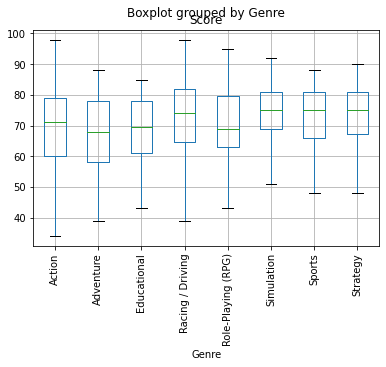

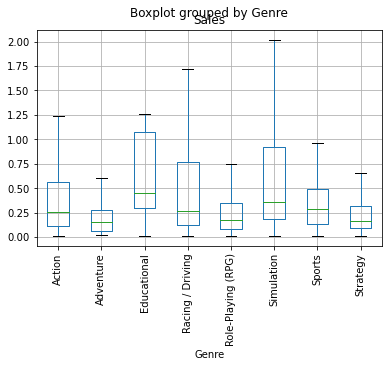

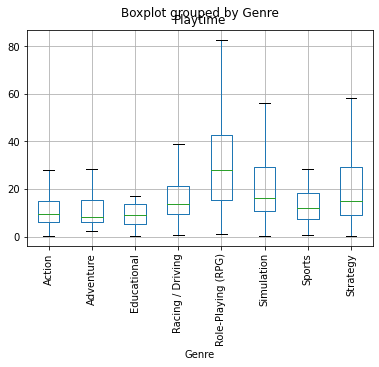

In [6]:
#Repeat previous step with genre
data.boxplot(column = ['Score'], by = 'Genre', rot = 90, showfliers = False)
data.boxplot(column = ['Sales'], by = 'Genre', rot = 90, showfliers = False)
data.boxplot(column = ['Playtime'], by = 'Genre', rot = 90, showfliers = False)
plt.show()


Just like the other 2 sets of plots, this shows that different types of games tend to perform better in some categories than they do others. RPG games have by far the most involvement, but barely make any money.

These 9 plots give a lot of insight to game performance. They just how differently games can perform depending on what metrics you deem important. For instance, if you only consider success by the amount of money the game makes, 4+ player educational games on the Xbox are definitely the way to go. If you only care about how much people play your game, you should make a solo RPG game on the xbox. And if you just want to impress critics with your game, try a 4+ player racing game on the Playstation.

<h2>Part 3: Application</h2>

We now know how different types of games are received by the public with 9 very specific plots. However, having a lot of detailed data means nothing if we cannot generalize it. We need to figure out how to use this data to determine what the best overall type of game is. The issue is we have no way to say without a doubt that one game is better than another. In order to properly compare games we can no longer have 3 different performance metrics. We need 1 universal score to tell us what games are better than others. To do this we will combine the metrics we find important into a formula in order to rank every game on the list. First lets add a collumn to the table to show how a game ranks in each of the 3 categories.

In [7]:
#Add new columns to diplay the percentile of a games performance
data['Score_Rank'] = data['Score'].rank(pct = True)
data['Sales_Rank'] = data['Sales'].rank(pct = True)
data['Playtime_Rank'] = data['Playtime'].rank(pct = True)
data

,Title,Year,Platform,Genre,Players,Score,Sales,Playtime,Score_Rank,Sales_Rank,Playtime_Rank
390,007: From Russia with Love,2006,Playstation,Racing / Driving,1,61,0.07,6.383333,0.224270,0.151690,0.210445
389,007: From Russia with Love,2006,Playstation,Action,1,61,0.07,6.383333,0.224270,0.151690,0.210445
660,300: March to Glory,2007,Playstation,Action,1,55,0.26,7.400000,0.125192,0.529570,0.263825
806,7 Wonders of the Ancient World,2007,Playstation,Strategy,1,51,0.08,7.483333,0.077573,0.177419,0.265745
785,7 Wonders of the Ancient World,2007,Nintendo,Strategy,1,60,0.10,7.483333,0.205069,0.235407,0.265745
...,...,...,...,...,...,...,...,...,...,...,...
825,Zoids Assault,2007,Xbox,Role-Playing (RPG),1,46,0.07,12.050000,0.039939,0.151690,0.504992
24,Zoo Keeper,2004,Nintendo,Action,1,74,0.10,7.150000,0.568356,0.235407,0.249616
1274,Zubo,2008,Nintendo,Adventure,1,75,0.05,15.000000,0.601767,0.091398,0.613287
1276,Zubo,2008,Nintendo,Strategy,1,75,0.05,15.000000,0.601767,0.091398,0.613287


We now have a score for each category from 0 to 1 with its percentile in comparison to every other game on the list. A 0 means it is the lowest of every game on the list and 1 meaning it is the highest. Now we can combine the scores depending on how important we feel each category is in order to receive 1 master ranking list.

To continue on with the tutorial you are going to have to determine what you personally feel is important when making a game. This tutorial will take all 3 factors into account equally for the sake of simplicity, but you can very easily exclude categories or weigh them differently if you so chose.


In [8]:
#Change these values as you see fit. The total should still add up to 1
score_weight = 1/3
sales_weight = 1/3
playtime_weight = 1/3

#check weights
if(score_weight+sales_weight+playtime_weight != 1):
    print("Warning: Categories are improperly weighted, please make sure all 3 values have a sum of 1")
    
#Producing Master Rank column and sort
data['Rank'] = (data['Score_Rank']*score_weight)+(data['Sales_Rank']*sales_weight)+(data['Playtime_Rank']*playtime_weight)
data = data.sort_values(by = 'Rank', ascending = False)

data

,Title,Year,Platform,Genre,Players,Score,Sales,Playtime,Score_Rank,Sales_Rank,Playtime_Rank,Rank
173,The Elder Scrolls IV: Oblivion,2006,Xbox,Action,1,94,2.12,101.083333,0.989631,0.948925,0.988095,0.975550
174,The Elder Scrolls IV: Oblivion,2006,Xbox,Role-Playing (RPG),1,94,2.12,101.083333,0.989631,0.948925,0.988095,0.975550
888,Super Smash Bros.: Brawl,2008,Nintendo,Action,4,93,5.71,51.433333,0.984255,0.989247,0.940092,0.971198
886,Grand Theft Auto IV,2008,Xbox,Action,1,98,5.76,38.883333,0.998848,0.990399,0.913594,0.967614
887,Grand Theft Auto IV,2008,Xbox,Racing / Driving,1,98,5.76,38.883333,0.998848,0.990399,0.913594,0.967614
...,...,...,...,...,...,...,...,...,...,...,...,...
879,Sea Monsters: A Prehistoric Adventure,2007,Nintendo,Action,1,43,0.01,5.000000,0.026882,0.006912,0.140553,0.058116
861,Hot Pixel,2007,Playstation,Action,1,55,0.03,0.716667,0.125192,0.036098,0.008449,0.056580
1301,Chicken Hunter,2008,Nintendo,Action,1,39,0.02,1.500000,0.015745,0.020353,0.031490,0.022529
872,Turn It Around,2007,Nintendo,Sports,1,39,0.02,1.000000,0.015745,0.020353,0.014593,0.016897


We now have our list with a column for each games master score, a you can see the percentile does not range exactly from 0-1 because no game was best or worst in all 3 categories, but the games at the ends get pretty close. This ranking system appears to work very well as you can see the top 3 games are Oblivion, Super Smash Brothers, and Grand Theft Auto. These are very well known and popular games, while the games at the bottom are not only games that flopped, but are so bad most people have never even heard of them. 

Now that we have an acceptable universal metric, we can repeat what we did previously and show how the independant factors influence the performance metrics. The difference this time is that we are now only using 1 performance metric so there is no ambiguity on what games are performing best.

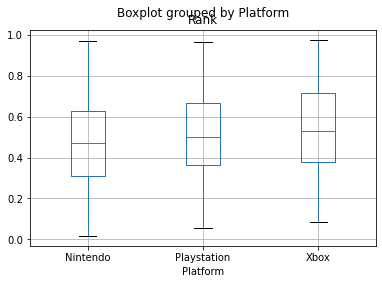

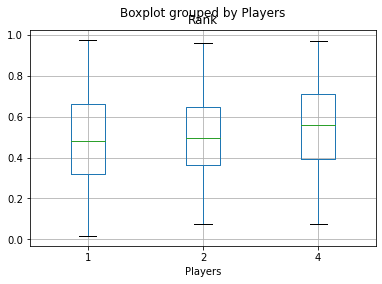

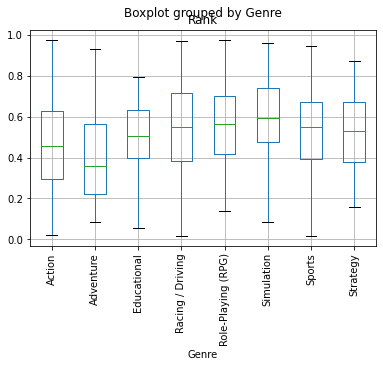

In [9]:
#Repeat boxplot creation with new y metric
data.boxplot(column = ['Rank'], by = 'Platform')
data.boxplot(column = ['Rank'], by = 'Players')
data.boxplot(column = ['Rank'], rot = 90, by = 'Genre')
plt.show()

We now have results that are much easier to interpret. In an equally weighted ranking, The average 4+ player simulation game on the Xbox performs the best, while single player adventure games developed for Nintendo Consoles perform the worst on average. This is not to say those standards can not be broken, but as a developer it is definitley the safer choice to go with what usually performs better.   

<h2>Part 4: Trendline Analysis</h2>
A glaring issue with these generalizations is still in that the data is 12-16 years old. We do not know if these results still hold true today. What we can do to mitigate this is group the games by year and try to predict a pattern, we can see what the results would be today if the trend from these selected 5 years continued.

In [10]:
#Function to return the average given a year and variable
def get_avg(year, varCol, varVal):
    list = []
    for i in range(len(data)):
        if (data.loc[i,"Year"] == year):
            if (data.loc[i,varCol] == varVal):
                list.append(data.loc[i,"Rank"])
    if len(list) > 0:
        return sum(list)/len(list)
    else:
        return 0

#Function to return a list of the average every year    
def get_list(varCol,varVal):
    list = []
    for i in years:
        list.append(get_avg(i,varCol,varVal))     
    return list


#Create list for every ind variable performance by year
years = data['Year'].unique()


Nintendo = get_list("Platform", "Nintendo")
Playstation = get_list("Platform", "Playstation")
Xbox = get_list("Platform", "Xbox")

solo = get_list("Players", 1)
duo = get_list("Players", 2)
group = get_list("Players", 4)

Action = get_list("Genre", "Action")
Adventure = get_list("Genre", "Adventure")
Ed = get_list("Genre", "Educational")
Driving = get_list("Genre", "Racing / Driving")
RPG = get_list("Genre", "Role-Playing (RPG)")
Sim = get_list("Genre", "Simulation")
Sports = get_list("Genre", "Sports")
Strategy = get_list("Genre", "Strategy")

We now have a list for the average rank of every controlable variable by year. We can use these to make regression lines that can model the predicted values past 2008

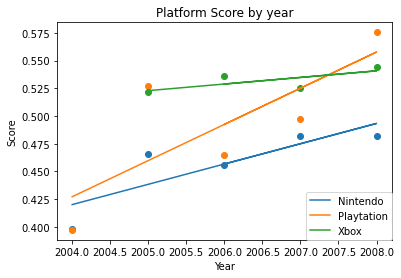

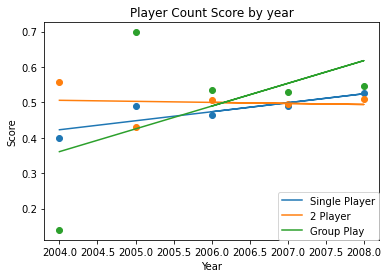

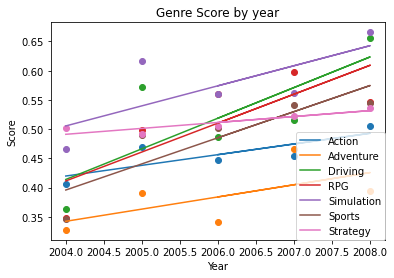

In [11]:
#Function to make and display a regression line to the current plot 
def make_regr(var, vals):
    #Convert list to dataframe
    df =  pd.DataFrame(vals, columns = ['Vals'])
    df['years'] = years
    df = df[df.Vals != 0]
    x = df.years.values.reshape(len(df),1)
    y = df.Vals.values.reshape(len(df),1)
    
    #Create prediction model and plot
    reg = LinearRegression().fit(x, y)
    pred = reg.predict(x)
    plt.scatter(x,y)
    plt.plot(x,pred, label = var)
    
    #Return the value the model predicts for the selected year(default year: 2020)
    coef = reg.coef_[0][0]
    intercept = reg.intercept_[0]
    year = 2020 #you can change 2020 to predict any year you like
    today = (year*coef)+intercept
    return today

#Plot the graphs over time while saving what the regression line suggests the value in 2020 would be
#Make plot for platform
nintendo = make_regr("Nintendo",Nintendo)
playstation = make_regr("Playtation", Playstation)
xbox = make_regr("Xbox", Xbox)
plt.ylabel("Score")
plt.xlabel("Year")
plt.title("Platform Score by year")
plt.legend( loc = 'lower right', borderaxespad=0.)
plt.show()

#Make plot for player count
solo = make_regr("Single Player",solo)
duo = make_regr("2 Player", duo)
group = make_regr("Group Play", group)
plt.ylabel("Score")
plt.xlabel("Year")
plt.title("Player Count Score by year")
plt.legend( loc = 'lower right', borderaxespad=0.)
plt.show()

#Make plot for Genre
#Side note: education needed to be dropped because there were too many years missing to form an accurate regression line
action = make_regr("Action",Action)
adventure = make_regr("Adventure", Adventure)
driving = make_regr("Driving",Driving)
rpg = make_regr("RPG", RPG)
sim = make_regr("Simulation", Sim)
sport = make_regr("Sports",Sports)
strat = make_regr("Strategy", Strategy)
plt.ylabel("Score")
plt.xlabel("Year")
plt.title("Genre Score by year")
plt.legend( loc = 'lower right', borderaxespad=0.)
plt.show()




Now you can see that the different categories are changing at very different rates over time, but we need to see if any category will change enough by 2020 to declare it the new most popular. We saved the 2020 expected value of each category while generating the regression lines and now we can plot those results.

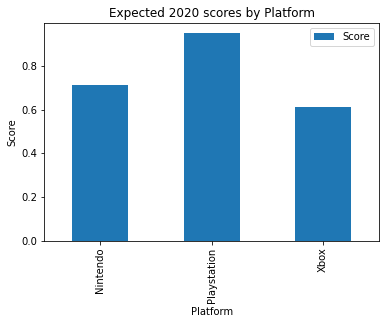

      Score     Platform
0  0.712906     Nintendo
1  0.949245  Playstation
2  0.612193         Xbox


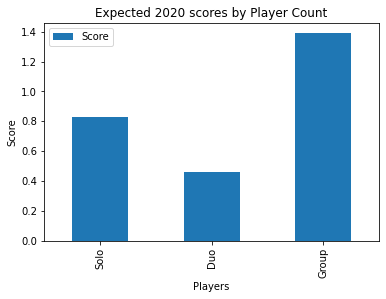

      Score Players
0  0.829237    Solo
1  0.458690     Duo
2  1.388864   Group


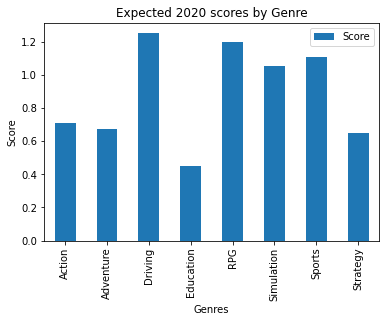

      Score      Genres
0  0.712529      Action
1  0.675933   Adventure
2  1.252884     Driving
3  0.453507   Education
4  1.203297         RPG
5  1.055078  Simulation
6  1.111410      Sports
7  0.653379    Strategy


In [12]:
#Display plot for platform
plat = pd.DataFrame([nintendo,playstation,xbox], columns = ['Score'])
plat['Platform'] = ['Nintendo', 'Playstation', 'Xbox']
ax = plat.plot.bar(x = 'Platform', y = 'Score')
plt.ylabel("Score")
plt.title("Expected 2020 scores by Platform")
plt.show()
print(plat)

#Display plot for player count
play = pd.DataFrame([solo,duo,group], columns = ['Score'])
play['Players'] = ['Solo', 'Duo', 'Group']
ax = play.plot.bar(x = 'Players', y = 'Score')
plt.ylabel("Score")
plt.title("Expected 2020 scores by Player Count")
plt.show()
print(play)

#Display plot for genre
#Eductaion will use its 2004-2008 average because no accurate prediction could be made
Ed[:] = [x for x in Ed if x != 0] 
ed = sum(Ed)/len(Ed)
gen = pd.DataFrame([action,adventure,driving,ed,rpg,sim,sport,strat], columns = ['Score'])
gen['Genres'] = ['Action', 'Adventure', 'Driving','Education', 'RPG', 'Simulation', 'Sports', 'Strategy']
ax = gen.plot.bar(x = 'Genres', y = 'Score')
plt.ylabel("Score")
plt.title("Expected 2020 scores by Genre")
plt.show()
print(gen)


These results are much different from the results we saw based entirely on the 2004-2008 averages. Group games appear to still be the highest scoring games, but now the top spot goes to racing/driving games on the playstation. This shows just how important it is to not only look at statistics, but also analyze trendlines and make predictions. Just by looking at the averages we thought the best game to make was a simulation game on the xbox, but the trendlines showed that both that genre and platform we not gaining popularity anywhere near the rate of others. You can use this type of analysis to stay ahead of the competition and create games designed to have a successful future, rather than pander to what is popular at the moment.

Now we do not have the data leading all the way up to 2020 so we do not know how accurate these predictions are, but at first glance there does seem to be some merit to them. Here is a chart of the Xbox 1, Playstation 4, and Nintendo Switch console sales over the past few years...

![image](resources/Console_Sales.png)

This chart verifies that our prediction of increasing Playstation popularity was not just a 5 year fluke. Playstation consoles have grown far more popular than the other 2 over the past decade, which is exactly what our trendline predicted. And increasing console popularity can almost guarantee that the games released on that platform will sell more copies as a result.

So now you are equipped with the tools you need to predict game success. You can go back through and replicate this tutorial on your own if you wish to make modifications based on prsonal ideas. You can change the weights of the ranking system to lean heavier on the metrics you feel are more important. You can also run the predictive bar graphs on years other than 2020, so if a game is going to take you a few years to make you know what the market will be like on release. You can also import more recent data (as long as it contains the same information we used) in order to make a more up to date trendline. It is up to you to design the best game possible and you have all the data right here to do it.  